# Drug Classification

#### Problem Description: 

Classifying Drugs Using Support Vector Machine (SVM).


#### Solution:

Create a model that will allow us to enter a few features of a patient's health related information and be able to predict which drug should be prescribed to them. These features are linked to Cardiovascular Disease (CVD).


#### Conclusion: 

Based on the demographic factors and health conditions, what is the accuracy that a drug will be correctly prescribed to a patient? 

98% according to SVM linear model.

The accuracy looks a bit high, this maybe because the dataset is imbalanced as there is more drug Y than other drugs.
Imbalanced datasets can lead to overfitting of the model (it works well with training data, but is unable to generalize well with new data). We can use SMOTE which is an oversampling technique that generates synthetic samples from the minority class to fix this. For example below:

from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

### How get Data

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [179]:
df = pd.read_csv("drug200.csv") 
# predict drug type that is required/accurate for the patient based on their conditions and 
# demographics

In [180]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [181]:
round(df.describe(),2)

,Age,Na_to_K
count,200.00,200.00
mean,44.32,16.08
std,16.54,7.22
min,15.00,6.27
25%,31.00,10.45
50%,45.00,13.94
75%,58.00,19.38
max,74.00,38.25


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### Exploratory Data Analysis (EDA)

#### Any missing values

In [183]:
df.isnull().sum() # no nulls in each column...good. 

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

#### Counts of Male and Female

In [184]:
df[df['Sex'] == 'F'].count()

Age            96
Sex            96
BP             96
Cholesterol    96
Na_to_K        96
Drug           96
dtype: int64

In [185]:
df[df['Sex'] == 'M'].count()

Age            104
Sex            104
BP             104
Cholesterol    104
Na_to_K        104
Drug           104
dtype: int64

In [186]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [187]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [188]:
df['Sex'].value_counts() # Looks like data is balanced

# 52% of records is male
# 48% of records is female

M    104
F     96
Name: Sex, dtype: int64

In [189]:
df['Drug'].value_counts() 

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

#### Determine patterns in BP and Cholestrol by Sex

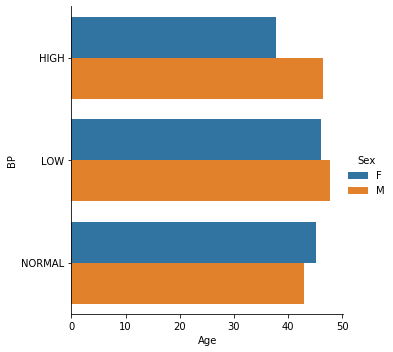

In [190]:
# Categorical Plots
sns.catplot(x="Age", y="BP",hue='Sex', kind="bar", data=df, ci = None)

# More number of men have higher BP than number of women

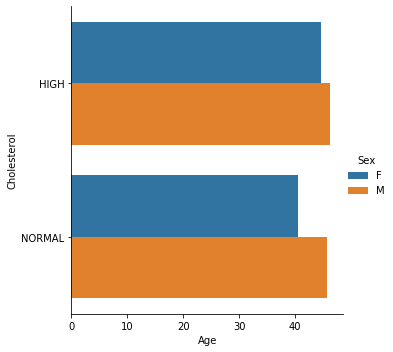

In [191]:
sns.catplot(x="Age", y="Cholesterol",hue='Sex', kind="bar", data=df, ci= None)

# Slightly more number of men have higher cholestrol than number of women

#### Na_to_K levels by Sex

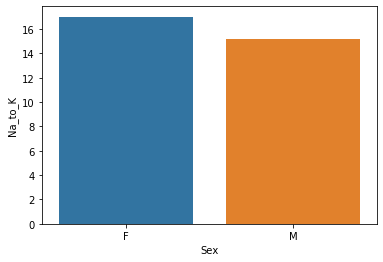

In [192]:
sns.barplot(data=df, x="Sex", y="Na_to_K", ci=None)

# Na_to_K levels higher amongst women
# A high urinary Na/K ratio is an indicator of a higher Na intake and a lower K intake

#### Na_to_K levels by Age and Grouped by Sex

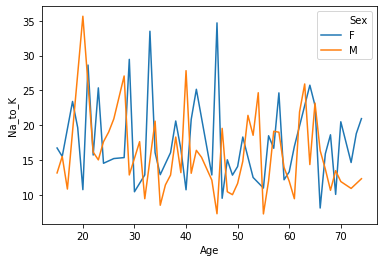

In [193]:
sns.lineplot(data=df, x="Age", y="Na_to_K", hue="Sex", ci=None)

### Training and Testing the SVM 

In [195]:
X = df.drop(['Drug'],axis = 1) # for X - input variables

y = df['Drug'] # y - output variable (what we're prediction)

In [196]:
X.head(5)

# BP and Cholesterol - Ordinal (Order/Ranking involved)
# Sex - Nominal & Binary
# Drug - Nominal (Categorical No Order/Ranking involved)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [197]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 0)

### Data Transformation: One Hot Encoding (Dummy Variable Coding) of Categorical Variables 

In [199]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

### Evaluating the SVC Model

In [205]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [206]:
clf = SVC(kernel='linear') #SVM model
clf.fit(X_train, y_train) # Fit data to model

#print('Accuracy of SVM classifier on this training is {:.2f}'.format(clf.score(X_train, y_train)))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [207]:
clf_predict = clf.predict(X_test) # predict y using X test data

In [208]:
print(classification_report(y_test, clf_predict))
print(confusion_matrix(y_test, clf_predict))

clf_acc = accuracy_score(y_test, clf_predict) # eval accuracy of prediction based on true y test vals
print('SVM classifier accuracy is: {:.2f}%'.format(clf_acc*100))


              precision    recall  f1-score   support

       DrugY       1.00      0.97      0.98        30
       drugA       1.00      1.00      1.00         5
       drugB       0.75      1.00      0.86         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18

    accuracy                           0.98        60
   macro avg       0.95      0.99      0.97        60
weighted avg       0.99      0.98      0.98        60

[[29  0  1  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
SVM classifier accuracy is: 98.33%


### Conclusion

Based on the demographic factors and health conditions, what is the accuracy that a drug will be correctly prescribed to a patient? 

98% according to SVM linear model.

The accuracy looks a bit high, this maybe because the dataset is imbalanced as there is more drug Y than other drugs.
Imbalanced datasets can lead to overfitting of the model (it works well with training data, but is unable to generalize well with new data). We can use SMOTE which is an oversampling technique that generates synthetic samples from the minority class to fix this. For example below:

from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)